In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1a91fc44-b790-469c-8a7d-59d63d8ad096',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-03T17:29:33.222Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9851}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11752, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11722,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975924e+07,1.975924e+07,False,NaN,1,NaN,NaN,None,2024-09-26T16:00:00.000Z,65249.508718,3.315616e+10,20.7655,1.256600,2.763085,3.297745,5.786198,-3.544907,7.036220,1.289281e+12,56.3053,1.370240e+12,None,2024-09-26T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-26 21:32:21.430191
1,1027,Ethereum,ETH,ethereum,9351,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203628e+08,1.203628e+08,True,NaN,2,NaN,NaN,None,2024-09-26T15:59:00.000Z,2654.030113,1.721013e+10,19.1302,1.285410,2.077345,8.764782,2.912249,-18.816334,-22.209442,3.194464e+11,13.9508,3.194464e+11,None,2024-09-26T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-26 21:32:21.430191
2,825,Tether USDt,USDT,tether,98795,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.192813e+11,1.213727e+11,True,NaN,3,NaN,NaN,None,2024-09-26T15:59:00.000Z,1.000172,6.216616e+10,15.3048,-0.012094,0.007115,0.004895,0.039006,0.017824,0.190548,1.193018e+11,5.2101,1.213935e+11,None,2024-09-26T15:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-26 21:32:21.430191
3,1839,BNB,BNB,bnb,2246,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459333e+08,1.459333e+08,False,NaN,4,NaN,NaN,None,2024-09-26T15:59:00.000Z,601.987995,1.971161e+09,9.9259,1.229818,1.385132,6.524505,9.045696,3.674620,5.220602,8.785008e+10,3.8387,8.785008e+10,None,2024-09-26T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-26 21:32:21.430191
4,5426,Solana,SOL,solana,741,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.688419e+08,5.853849e+08,True,NaN,5,NaN,NaN,None,2024-09-26T15:59:00.000Z,157.208807,2.737799e+09,2.9563,2.311420,4.376310,10.062346,2.235348,-14.608421,9.030035,7.370607e+10,3.2205,9.202766e+10,None,2024-09-26T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-26 21:32:21.430191
5,3408,USDC,USDC,usd-coin,22203,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.615215e+10,3.615215e+10,False,NaN,6,NaN,NaN,None,2024-09-26T15:59:00.000Z,1.000106,6.159255e+09,9.4920,-0.002547,0.006032,0.009382,0.029416,0.013220,0.019599,3.615600e+10,1.5798,3.615600e+10,None,2024-09-26T15:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-26 21:32:21.430191
6,52,XRP,XRP,xrp,1396,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.650566e+10,9.998718e+10,False,NaN,7,NaN,NaN,None,2024-09-26T16:00:00.000Z,0.592812,1.135199e+09,9.4054,0.405396,1.162379,1.112081,-0.246487,-1.746031,24.613410,3.349723e+10,1.4629,5.928119e+10,None,2024-09-26T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-26 21:32:21.430191
7,74,Dogecoin,DOGE,dogecoin,1072,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.461184e+11,1.461184e+11,True,NaN,8,NaN,NaN,None,2024-09-26T16:00:00.000Z,0.116935,1.127480e+09,65.0650,1.872888,7.249425,11.399373,12.480767,-9.735638,-6.943120,1.708630e+10,0.7466,1.708630e+10,None,2024-09-26T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-26 21:32:21.430191
8,11419,Toncoin,TON,toncoin,568,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.535854e+09,5.112336e+09,True,Na

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1a91fc44-b790-469c-8a7d-59d63d8ad096',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

     # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df 

    #if not os.path.isfile(r'E:\python test\API.csv'):
     #   df.to_csv(r'E:\python test\API.csv', header='column_names')
    #else:
     #   df.to_csv(r'E:\python test\API.csv', mode='a', header=False)
    

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2024-09-26T16:04:37.267Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9815}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11722, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [20]:
df72 = pd.read_csv(r"E:\python test\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975743e+07,1.975743e+07,False,NaN,1,NaN,NaN,NaN,2024-09-22T14:10:00.000Z,62522.015025,1.537574e+10,-27.5568,-0.422657,-1.017905,3.847919,1.207839,-6.031088,1.399841,1.235274e+12,56.5214,1.312962e+12,NaN,2024-09-22T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-22 19:41:35.588925
1,1,1027,Ethereum,ETH,ethereum,9337,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203481e+08,1.203481e+08,True,NaN,2,NaN,NaN,NaN,2024-09-22T14:09:00.000Z,2564.861344,1.135351e+10,-13.7412,-0.710660,-0.113930,6.313230,-4.252021,-25.581311,-22.895305,3.086763e+11,14.1246,3.086763e+11,NaN,2024-09-22T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-22 19:41:35.588925
2,2,825,Tether USDt,USDT,tether,98245,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.191392e+11,1.213868e+11,True,NaN,3,NaN,NaN,NaN,2024-09-22T14:09:00.000Z,1.000086,3.549166e+10,-15.2250,-0.028078,-0.017823,0.000424,0.008878,0.001919,0.055378,1.191495e+11,5.4504,1.213973e+11,NaN,2024-09-22T14:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-22 19:41:35.588925
3,3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459335e+08,1.459335e+08,False,NaN,4,NaN,NaN,NaN,2024-09-22T14:09:00.000Z,579.092740,1.517852e+09,-12.3950,-0.627643,-0.734848,3.580458,-0.539908,-1.103982,1.830714,8.450906e+10,3.8658,8.450906e+10,NaN,2024-09-22T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-22 19:41:35.588925
4,4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.686056e+08,5.850760e+08,True,NaN,5,NaN,NaN,NaN,2024-09-22T14:09:00.000Z,143.535303,1.392239e+09,-21.8518,-0.936425,-3.426144,5.590569,-1.234506,-19.281669,10.868105,6.726145e+10,3.0776,8.397907e+10,NaN,2024-09-22T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-22 19:41:35.588925
5,5,3408,USDC,USDC,usd-coin,22159,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.591430e+10,3.591430e+10,False,NaN,6,NaN,NaN,NaN,2024-09-22T14:09:00.000Z,0.999946,2.744659e+09,-29.0958,-0.025739,-0.018025,0.011373,0.008123,0.006680,-0.000908,3.591237e+10,1.6432,3.591237e+10,NaN,2024-09-22T14:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-22 19:41:35.588925
6,6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.643451e+10,9.998721e+10,False,NaN,7,NaN,NaN,NaN,2024-09-22T14:10:00.000Z,0.587468,1.144357e+09,54.7024,-0.591431,0.127325,0.041193,-2.044917,-6.881747,22.177145,3.315349e+10,1.5166,5.874683e+10,NaN,2024-09-22T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-22 19:41:35.588925
7,7,74,Dogecoin,DOGE,dogecoin,1068,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.460628e+11,1.460628e+11,True,NaN,8,NaN,NaN,NaN,2024-09-22T14:10:00.000Z,0.106079,5.014805e+08,8.8251,-0.564700,-1.626062,0.257149,-3.167019,-20.583145,-11.223931,1.549416e+10,0.7088,1.549416e+10,NaN,2024-09-22T14:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-22 19:41:35.588925
8,8,11419,Toncoin,TON,toncoin,561,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd.

In [ ]:
df

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [ ]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [ ]:
df4 = df3.stack()
df4

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [ ]:
df6 = df5.reset_index()
df6

In [ ]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

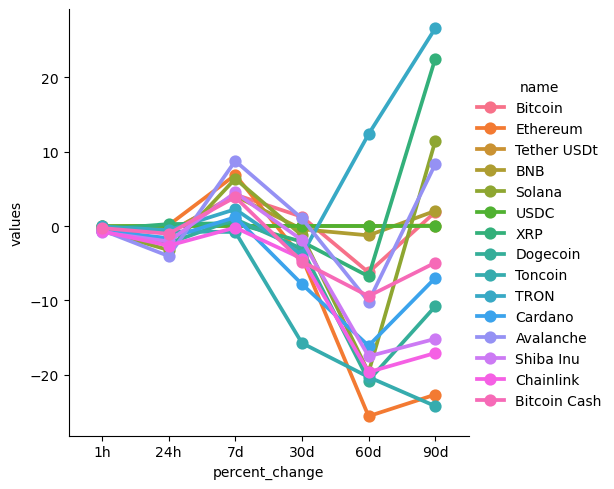

In [61]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10



In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)